In [1]:
from os import listdir
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from PIL import Image
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import random

Using TensorFlow backend.


In [2]:
def load_photos(directory):
    images = []
    labels_dir = []
    dir_list = listdir(directory)
    random.shuffle(dir_list)
    for name in dir_list:
        filename = directory + '/' + name
        # load an image from file
        image = load_img(filename, target_size=(96, 160))
        # convert the image pixels to a numpy array
        image = img_to_array(image)
        # get image id + labels
        value_dir = float(name.split('_')[0])
        labels_dir.append(value_dir)
        images.append(image)
    return images, labels_dir

In [3]:
dataset = "../../../../Big_test"

In [4]:
# load images from both train and test groups
directory = dataset+'/Train'
images, labels_dir = load_photos(directory)
nb_images = len(images)
print('Loaded Images and labels for training: %d' % nb_images)

Loaded Images and labels for training: 1927


In [5]:
#Normalise images
images = np.array(images)
images /= 255.0

In [6]:
#convert datas to dummyvalues
labels_dir = np.array(pd.get_dummies(labels_dir))

(array([1, 0, 0], dtype=uint8), <matplotlib.image.AxesImage at 0x1f1f0b47ba8>)

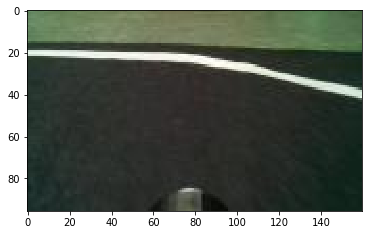

In [7]:
labels_dir[42], plt.imshow(images[42])

In [8]:
from keras.models import Model, Sequential
from keras.layers import *
import keras.backend as K
import keras.optimizers as Optimizers
import keras.callbacks

In [9]:
#from keras.models import load_model
#model = load_model("model_bigrace_original_5.h5")

In [10]:
'''
Model from PatateV2
'''

K.clear_session()
############################################################# 

img_in = Input(shape=(96, 160, 3), name='img_in')
x = img_in

x = Convolution2D(2, (5,5), strides=(2,2), use_bias=False)(x)       
x = BatchNormalization()(x)
x = Activation("relu")(x)
x = Convolution2D(4, (5,5), strides=(2,2), use_bias=False)(x)       
x = BatchNormalization()(x)
x = Activation("relu")(x)
x = Dropout(.4)(x)
x = Convolution2D(8, (5,5), strides=(2,2), use_bias=False)(x)       
x = BatchNormalization()(x)
x = Activation("relu")(x)
x = Dropout(.5)(x)

x = Flatten(name='flattened')(x)

x = Dense(100, use_bias=False)(x) 
x = BatchNormalization()(x)
x = Activation("relu")(x)
x = Dropout(.4)(x)
x = Dense(50, use_bias=False)(x)  
x = BatchNormalization()(x)
x = Activation("relu")(x)
x = Dropout(.3)(x)

out_dir = Dense(3, activation='softmax')(x)


# Compile Model
model = Model(inputs=[img_in], outputs=[out_dir])
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

model.summary()

W1129 15:44:03.194991 13724 deprecation_wrapper.py:119] From c:\users\rock_\appdata\local\programs\python\python37\lib\site-packages\keras\backend\tensorflow_backend.py:88: The name tf.reset_default_graph is deprecated. Please use tf.compat.v1.reset_default_graph instead.

W1129 15:44:03.194991 13724 deprecation_wrapper.py:119] From c:\users\rock_\appdata\local\programs\python\python37\lib\site-packages\keras\backend\tensorflow_backend.py:91: The name tf.placeholder_with_default is deprecated. Please use tf.compat.v1.placeholder_with_default instead.

W1129 15:44:03.220650 13724 deprecation_wrapper.py:119] From c:\users\rock_\appdata\local\programs\python\python37\lib\site-packages\keras\backend\tensorflow_backend.py:95: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W1129 15:44:03.221616 13724 deprecation_wrapper.py:119] From c:\users\rock_\appdata\local\programs\python\python37\lib\site-packages\keras\backend\tensorflow_backend.py:507

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
img_in (InputLayer)          (None, 96, 160, 3)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 46, 78, 2)         150       
_________________________________________________________________
batch_normalization_1 (Batch (None, 46, 78, 2)         8         
_________________________________________________________________
activation_1 (Activation)    (None, 46, 78, 2)         0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 21, 37, 4)         200       
_________________________________________________________________
batch_normalization_2 (Batch (None, 21, 37, 4)         16        
_________________________________________________________________
activation_2 (Activation)    (None, 21, 37, 4)         0         
__________

In [11]:
model_name="model_test.h5"

In [12]:
#save best model if model improved
best_checkpoint = keras.callbacks.ModelCheckpoint(model_name, monitor='val_loss', verbose=1, save_best_only=True, mode='min')

In [13]:
h = model.fit(images, labels_dir, batch_size=64, epochs=100, validation_split=0.2, verbose=1, callbacks=[best_checkpoint])

W1129 15:44:08.268096 13724 deprecation.py:323] From c:\users\rock_\appdata\local\programs\python\python37\lib\site-packages\tensorflow\python\ops\math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Train on 1541 samples, validate on 386 samples
Epoch 1/100
1541/1541 [==============================] - 4s 3ms/step - loss: 1.3575 - acc: 0.3400 - val_loss: 0.8483 - val_acc: 0.6710

Epoch 00001: val_loss improved from inf to 0.84835, saving model to model_test.h5
Epoch 2/100
1541/1541 [==============================] - 3s 2ms/step - loss: 0.9071 - acc: 0.6035 - val_loss: 0.7561 - val_acc: 0.7098

Epoch 00002: val_loss improved from 0.84835 to 0.75614, saving model to model_test.h5
Epoch 3/100
1541/1541 [==============================] - 3s 2ms/step - loss: 0.7573 - acc: 0.6976 - val_loss: 0.5979 - val_acc: 0.7694

Epoch 00003: val_loss improved from 0.75614 to 0.59794, saving model to model_test.h5
Epoch 4/100
1541/1541 [==============================] - 3s 2ms/step - loss: 0.6528 - acc: 0.7326 - val_loss: 0.7206 - val_acc: 0.7591

Epoch 00004: val_loss did not improve
Epoch 5/100
1541/1541 [==============================] - 4s 2ms/step - loss: 0.6196 - acc: 0.7631 - val_loss: 0.5920 

1541/1541 [==============================] - 4s 2ms/step - loss: 0.2860 - acc: 0.8890 - val_loss: 0.2676 - val_acc: 0.8964

Epoch 00042: val_loss did not improve
Epoch 43/100
1541/1541 [==============================] - 4s 2ms/step - loss: 0.2531 - acc: 0.8962 - val_loss: 0.2423 - val_acc: 0.9067

Epoch 00043: val_loss did not improve
Epoch 44/100
1541/1541 [==============================] - 4s 2ms/step - loss: 0.2670 - acc: 0.9001 - val_loss: 0.2600 - val_acc: 0.9093

Epoch 00044: val_loss did not improve
Epoch 45/100
1541/1541 [==============================] - 4s 2ms/step - loss: 0.2802 - acc: 0.8929 - val_loss: 0.5882 - val_acc: 0.8497

Epoch 00045: val_loss did not improve
Epoch 46/100
1541/1541 [==============================] - 4s 2ms/step - loss: 0.2700 - acc: 0.8962 - val_loss: 0.3731 - val_acc: 0.8782

Epoch 00046: val_loss did not improve
Epoch 47/100
1541/1541 [==============================] - 4s 2ms/step - loss: 0.2533 - acc: 0.9066 - val_loss: 0.2590 - val_acc: 0.8990

E

1541/1541 [==============================] - 4s 2ms/step - loss: 0.1851 - acc: 0.9325 - val_loss: 0.1908 - val_acc: 0.9378

Epoch 00088: val_loss improved from 0.19238 to 0.19081, saving model to model_test.h5
Epoch 89/100
1541/1541 [==============================] - 4s 2ms/step - loss: 0.1878 - acc: 0.9306 - val_loss: 0.1977 - val_acc: 0.9326

Epoch 00089: val_loss did not improve
Epoch 90/100
1541/1541 [==============================] - 4s 2ms/step - loss: 0.1687 - acc: 0.9338 - val_loss: 0.2720 - val_acc: 0.9197

Epoch 00090: val_loss did not improve
Epoch 91/100
1541/1541 [==============================] - 4s 2ms/step - loss: 0.1981 - acc: 0.9234 - val_loss: 0.2101 - val_acc: 0.9275

Epoch 00091: val_loss did not improve
Epoch 92/100
1541/1541 [==============================] - 4s 2ms/step - loss: 0.1796 - acc: 0.9247 - val_loss: 0.1872 - val_acc: 0.9378

Epoch 00092: val_loss improved from 0.19081 to 0.18723, saving model to model_test.h5
Epoch 93/100
1541/1541 [==================

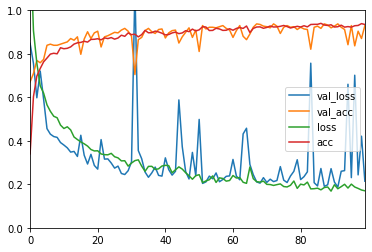

In [14]:
#print History graph
historydf = pd.DataFrame(h.history, index=h.epoch)
historydf.plot(ylim=(0,1))